In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
agencyData = pd.read_csv('AgencyMetrix.csv')
shootData = pd.read_csv('ShootMetrix.csv')
agencyData = agencyData.drop(columns=['Unnamed: 0'])
shootData = shootData.drop(columns=['Unnamed: 0'])

In [3]:
df = agencyData.merge(shootData, left_on='zipcode', right_on='ZIPCODE')
df = df.drop(columns=['ZIPCODE', 'zipcode'])
df.head(0)

,DPR,DSNY,NYPD,DEP,TLC,DOHMH,DOT,EDC,DHS,HPD,DOB,DOE,DCA,FDNY,DOITT,DOF,Shoot


In [4]:
train, test = train_test_split(df, test_size=0.2)
X_train = train.drop(columns=['Shoot'])
y_train = train[['Shoot']]
X_test = test.drop(columns=['Shoot'])
y_test = test[['Shoot']]

In [5]:
def getModelMSE(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_hat = model.predict(X_test)
  mse = mean_squared_error(y_hat, y_test)
  return mse

## Linear

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
lrMSE = getModelMSE(model, X_train, y_train, X_test, y_test)
lrMSE

8767.697352456684

## Ridge Regression

In [7]:
from sklearn.linear_model import Ridge
model = Ridge()
rgMSE = getModelMSE(model, X_train, y_train, X_test, y_test)
rgMSE


8762.256416972095

## Lasso 

In [8]:
from sklearn.linear_model import Lasso
model = Lasso()
lsMSE = getModelMSE(model, X_train, y_train, X_test, y_test)
lsMSE

8770.02558267259

## ElasticNet Regression

In [9]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
enMSE = getModelMSE(model, X_train, y_train, X_test, y_test)
enMSE

8779.484747957385

## Decision Tree

In [10]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
dtMSE = getModelMSE(model, X_train, y_train, X_test, y_test)
dtMSE

13995.142857142857

In [11]:
## Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
rfMSE = getModelMSE(model, X_train, y_train, X_test, y_test)
rfMSE

C:\Users\siyon\AppData\Local\Temp/ipykernel_5012/3116224756.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


10585.576354285715

## SVM

In [12]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
svMSE = getModelMSE(model, X_train, y_train, X_test, y_test)
svMSE

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8747.79679119198

<BarContainer object of 6 artists>

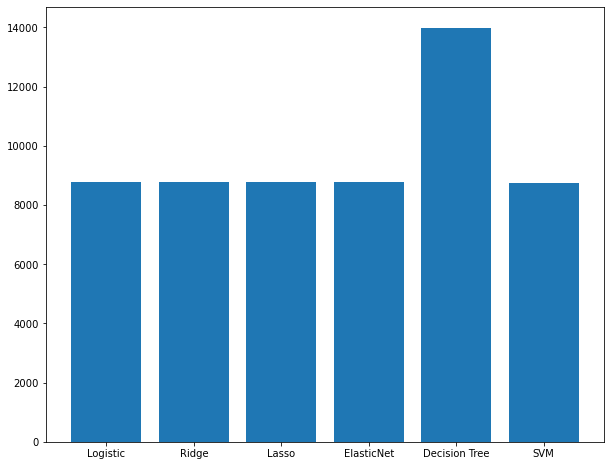

In [13]:
score = [lrMSE, rgMSE, lsMSE, enMSE, dtMSE, svMSE]
label = ['Logistic',
          'Ridge',
          'Lasso',
          'ElasticNet',
          'Decision Tree',
          'SVM']
plt.figure(figsize=(10, 8))
plt.bar(label, score)